# Imports

In [1]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import psycopg2 as pg2

# Graphing from Database

## Functions

In [2]:
# The following 4 cells are the work of Raees Khan (RAK177@pitt.edu)

def decorator_insert(original_function):
    """

    This function is a decorator for any function that would insert data
    into the DB and is designed in the Query/Content Model.
 
    """
    def wrapper_function(*args,**kwargs):
        a,b = original_function(*args,**kwargs)
        conn = pg2.connect(database= 'quantum_pulse', user='postgres', password='ADHQ$$')
        cur = conn.cursor()
        executable = cur.mogrify(a,b)
        cur.execute(executable)
        conn.commit()
        conn.close()
    return wrapper_function

def decorator_extract(original_function):
    """

This function is a decorator for any function that would extract data
into the DB and is designed in the Query/Content



|
    """

    def wrapper_function(*args, **kwargs):
        a, b = original_function(*args, **kwargs)
        conn = pg2.connect(database= 'quantum_pulse', user='postgres', password='ADHQ$$')
        cur = conn.cursor()
        executable = cur.mogrify(a,b)
        cur.execute(executable)
        data = cur.fetchall()
        conn.close()

        return unpack_data(data)

    return wrapper_function

In [3]:
@decorator_insert
def insert_data(params):

    """
        This function is used to upload data into the SQL DB.

        :param: Takes class params and set of params to be inserted.
        :type: list
        :rtype: string,list
        :return: returns a query string and a list of contents.

    """

    query = 'INSERT INTO data(date,data_id,raw_data0,raw_data1,sample,count_time,reset_time,avg,threshold,aom_delay,microwave_delay,type,start,stepsize,steps,pts,srs,avgcount,x_arr,sample_name,nv_name,waveguide,time_stamp) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,CURRENT_TIMESTAMP)'

    content = (params[0],params[1],params[2],params[3],params[4],
               params[5],params[6],params[7],params[8],params[9],
               params[10],params[11],params[12],params[13],params[14],
               params[15],params[16],params[17],params[18],params[19],
               params[20],params[21])
    return (query,content)


@decorator_extract
def extract_data(date = None, data_id = None, key = None, sample = None, count_time = None, reset_time = None,
                     avg = None, threshold = None, aom_delay = None, microwave_delay = None,
                     Type = None, start = None, stepsize = None, steps = None, avgcount = None,
                     pts = None,srs = None, sample_name = None, nv_name = None, waveguide = None):

    """
            This function is used to extract data from the SQL DB.

            :param: Takes inputs of what you want to search.
            :type: string,list
            :rtype: list
            :return: returns data object.

            |


    """
    if(date != None):
        date = date + '%'

        
    if(data_id != None):
        data_id = data_id + '%'

    content = []
    input = [date,data_id,key,sample,count_time,reset_time,avg,threshold,aom_delay,microwave_delay,Type,
             start,stepsize,steps,avgcount,pts,srs,sample_name,nv_name,waveguide]

    input_strings = [" date LIKE %s"," and data_id LIKE %s"," and key = %s"," and sample = %s"," and count_time = %s",
                     " and reset_time = %s"," and avg = %s"," and threshold = %s",
                     " and aom_delay = %s"," and microwave_delay = %s"," and Type = %s",
                     " and start = %s"," and stepsize = %s"," and steps = %s"," and avgcount = %s",
                     " and pts = %s"," and srs = %s"," and sample_name = %s", " and nv_name = %s", " and waveguide = %s"]
    query = 'SELECT * FROM data WHERE'
    val = True
    for i,j in enumerate(input):

        if(j!=None):
            if(input[0]==None and val == True):
                query = query + input_strings[i][4:]
                content.append(j)
                val = False
                continue
            content.append(j)
            query = query + input_strings[i]

    return (query, content)

class unpack_data: #List of all the accesible attributes
    def __init__(self, data):
        self.key = [row[0] for row in data]
        self.date = [row[1] for row in data]
        self.data_id = [row[2] for row in data]
        self.raw_data0 = [row[3] for row in data]
        self.raw_data1 = [row[4] for row in data]
        self.sample = [row[5] for row in data]
        self.count_time = [row[6] for row in data]
        self.reset_time = [row[7] for row in data]
        self.avg = [row[8] for row in data]
        self.threshold = [row[9] for row in data]
        self.aom_delay = [row[10] for row in data]
        self.mw_delay = [row[11] for row in data]
        self.type = [row[12] for row in data]
        self.start = [row[13] for row in data]
        self.stepsize = [row[14] for row in data]
        self.steps = [row[15] for row in data]
        self.pts = [row[16] for row in data]
        self.srs = [row[17] for row in data]
        self.avgcount = [row[18] for row in data]
        self.x_arr = [row[19] for row in data]
        self.sample_name = [row[20] for row in data]
        self.nv_name = [row[21] for row in data]
        self.waveguide = [row[22] for row in data]
        self.time_stamp = [row[23] for row in data]

In [4]:
def get_date(filepath):
    pathsplit = PurePath(filepath).parts
    return pathsplit[-2]

def get_data_id(filepath):
    pathsplit = PurePath(filepath).parts
    return pathsplit[-1]

def files_in_dir(dir_path):
    path = Path(dir_path).glob('**/*')
    files = [x for x in path if x.is_file()]

    all_files = []
    for file in files:
        file1= str(file)[:-4]
        if(file1 not in all_files and file1[46:48] != '._'):
            all_files.append(file1)
    return all_files

def parse_raw_data(file):
    filename = file+".txt"
    data = np.genfromtxt(filename,delimiter='\t')
    return (data[:,0],data[:,1])


def parse_data(file):
    
    data1,data2 = parse_raw_data(file)
    
    mfilename = file+".log"
    mfilehandle =open(mfilename)
    mdata = mfilehandle.readlines()
    mfilehandle.close()
    parse_data =[(x.strip('\n')) for x in mdata]
    param0 = [float(x) for x in (parse_data[0]).strip('][').split(', ')]
    param1 = eval(parse_data[1])
    param2 = eval(parse_data[2])
    param3 = int(parse_data[3])
    param4 = [float(x) for x in ((parse_data[4])[:-1]).split('\t')]
    param5 = (parse_data[6]).replace(" ",'_')[13:]
    param6 = parse_data[7][9:]
    param7 = parse_data[8].replace(" ",'_')[11:]
    
    date = get_date(file)
    data_id = get_data_id(file)
    sample = param0[0]
    count_time = param0[1]
    reset_time = param0[2]
    avg = param0[3]
    threshold = param0[4]
    aom_delay = param0[5]
    microwave_delay = param0[6]
    Type = str(param1['type'])
    start = float(param1['start'])
    stepsize = float(param1['stepsize'])
    steps = float(param1['steps'])
    pts = str(param2['PTS'])
    srs = str(param2['SRS'])
    avgcount = param3
    x_arr = param4
    sample_name = param5
    nv_name = param6
    waveguide = param7
    
    content = [date,data_id,list(data1),list(data2),sample,count_time,reset_time,avg,threshold,aom_delay,microwave_delay,Type,start,stepsize,steps,pts,srs,avgcount,x_arr,sample_name,nv_name,waveguide]
    
    return content
    

def upload(dir_path = r"/Users/ethanlilie/Downloads/DataR"):
    
    files = files_in_dir(dir_path)
    
    for file in files:
        try:
            content = parse_data(file)
            insert_data(content)
        except:
            a = PurePath(file).parts
            if(str(a[-1])[0:2] != "._"):
                print("Didn't work for %s" %file)
    

In [34]:
def analyze_data(data,pos):
    
    tempsig = np.array(data.raw_data0[pos]).astype('float64')
    tempref = np.array(data.raw_data1[pos]).astype('float64')
    numavgs = int(data.avgcount[pos])
    
    # the signal and refernce arrays need to be partitioned into lists
    # that are have numavg rows and numpoints columns
    tempsig = np.array_split(tempsig, numavgs)
    tempref = np.array_split(tempref, numavgs)
    #average along the rows
    signal = np.average(tempsig,axis=0)
    reference = np.average(tempref,axis=0)
    meanref = np.mean(reference)
    #calculate errors in signal and reference and then the x and y data
    sigerr=np.sqrt(signal)
    referr = np.sqrt(reference)
    #xdata = np.linspace(timestart,timestep*len(signal),len(signal))
    xdata = np.array(data.x_arr[pos]).astype('float64')  # it appears Kai saves the x array into the last element of mdata
    ydata = (signal - reference)/meanref + 1.0
    #error bar calculation is not perfect yet, error in meanref needs to
    #be taken into account
    errb = np.sqrt(sigerr**2 + referr**2)/meanref/np.sqrt(numavgs)
    # plt.errorbar(xdata,ydata,yerr=errb,fmt='o')
    # plt.show()
    return xdata,ydata,errb

def plotsingledatafile(data,pos,**kwargs):
    '''Plots the data in a file
    :param file: the path for the data file
    :param xaxis: kwarg string that gives the label for the x-axis
    :param yaxis: kwarg string that gives label for y-axis '''
    try:
        x1,y1,y1errb = analyze_data(data,pos)
        newdic = dict([])
        for k,v in kwargs.items():
            newdic[k] = v
        x_plot = np.linspace(x1[0],x1[-1],100)
        namestr = data.data_id[pos]
        #with plt.style.context('classic'):
        f=plt.figure(figsize=(20,8))
        plt.errorbar(x1,y1,yerr=y1errb,fmt='b-o',ecolor = 'blue')
        plt.title("Name: "+namestr + "\n")
        plt.xlabel(str(newdic['xaxis']))
        plt.ylabel(str(newdic['yaxis']))
        plt.xlim(x1[0],x1[-1])
        ymax = np.amax(y1)
        ymin = np.amin(y1)
            #print('ymax = {0},ymin = {1}'.format(ymax,ymin))
        plt.ylim(ymin-0.025,ymax+0.025)
        plt.tight_layout()
        plt.grid()
        plt.show()
    except:
        print("No data found!")

            

## NV Center #2

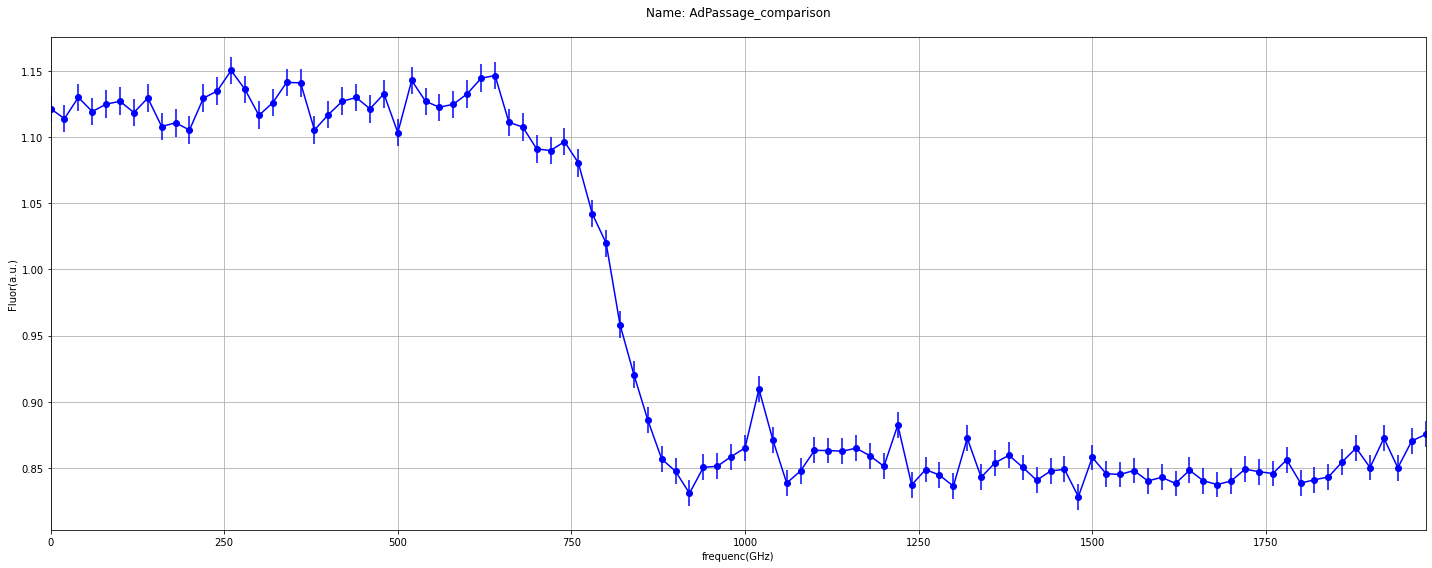

In [7]:
data = extract_data(nv_name = '#2')
pos = 3
plotsingledatafile(data,pos,xaxis=r'frequenc(GHz)',yaxis=r'Fluor(a.u.)')

#print(data.data_id)

## Data from 2021-05-19

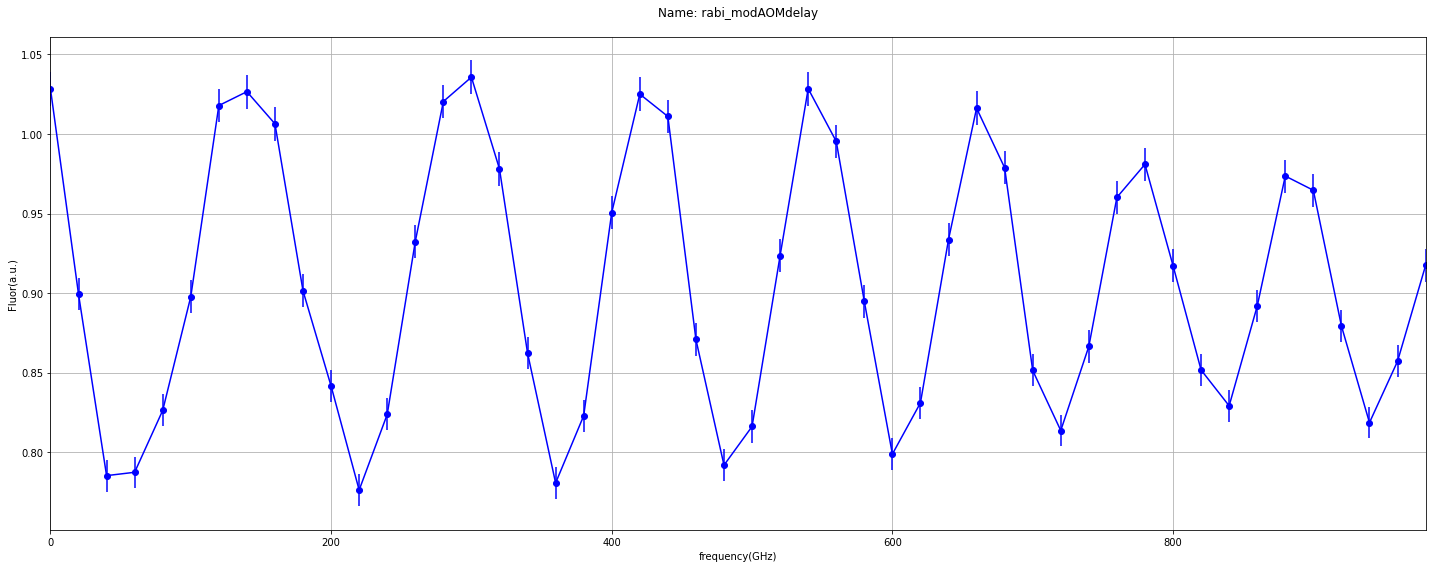

In [8]:
data = extract_data(date = '2021-05-19')
pos = 0 
plotsingledatafile(data, pos, xaxis=r'frequency(GHz)',yaxis=r'Fluor(a.u.)')


## Multiple plots showing





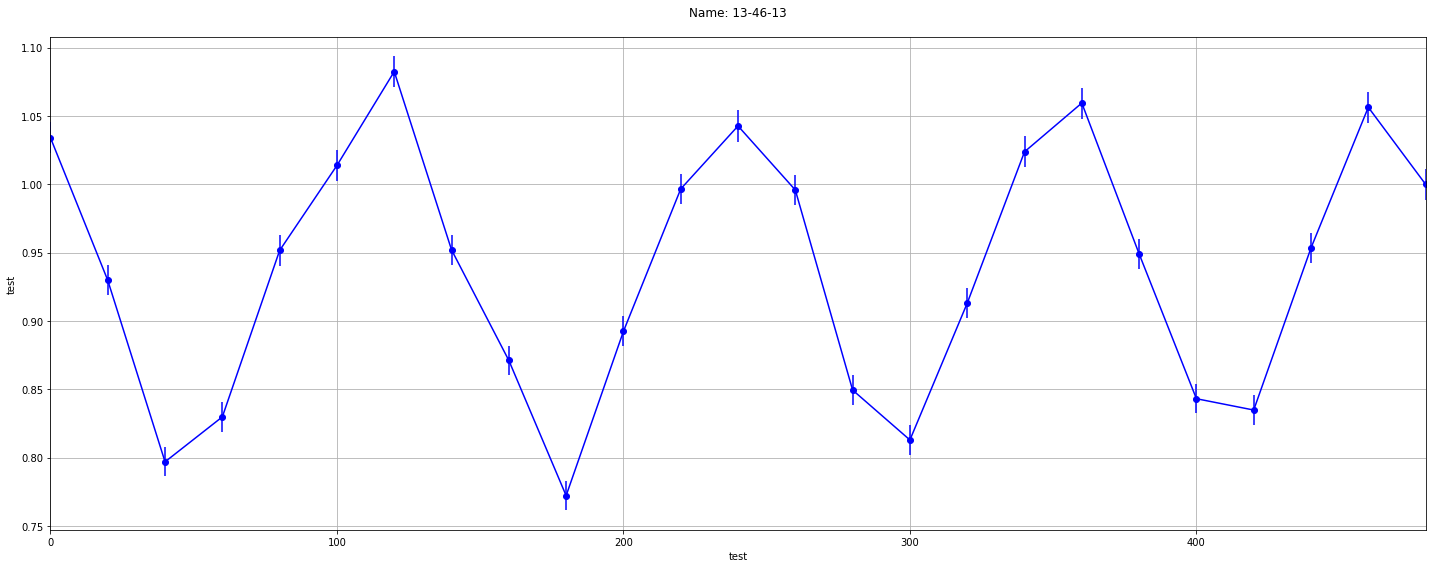

NameError: name 'x_plot' is not defined

In [33]:
#data = extract_data(aom_delay = 710)
#pos = 0
#plotsingledatafile(data,pos,xaxis=r'test',yaxis=r'test')
#plt.figure(figsize=(20,8))
#data = extract_data(date = '2021-05-19')
#pos = 0 
#plotsingledatafile(data, pos, xaxis=r'frequency(GHz)',yaxis=r'Fluor(a.u.)')
#plt.figure(1)

data = extract_data(aom_delay = 710)
pos = 0
a = plotsingledatafile(data, pos, xaxis=r'test', yaxis=r'test')
plt.show(x_plot)

data = extract_data(date = '2021-05-19')
pos = 0
b = plotsingledatafile(data, pos, xaxis=r'test', yaxis=r'test')
plt.show(a, b)


import matplotlib.pyplot as plt

x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(a[x1[0]], a[y1[0]])
ax1.scatter(b[x1[0]], b[y1[0]])
plt.legend(loc='upper left');
plt.show()

[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200. 220. 240. 260.
 280. 300. 320. 340. 360. 380. 400. 420. 440. 460. 480.]
[1.0340291  0.92972802 0.7969007  0.82979127 0.95154965 1.01372549
 1.08241619 0.95199241 0.87109424 0.77216951 0.89234662 0.99652119
 1.04263125 0.99576218 0.84939911 0.81290323 0.91296648 1.02371917
 1.05939279 0.94908286 0.843074   0.83478811 0.95338393 1.05629349
 0.99993675]
[  0.  20.  40.  60.  80. 100. 120. 140. 160. 180. 200. 220. 240. 260.
 280. 300. 320. 340. 360. 380. 400. 420. 440. 460. 480. 500. 520. 540.
 560. 580. 600. 620. 640. 660. 680. 700. 720. 740. 760. 780. 800. 820.
 840. 860. 880. 900. 920. 940. 960. 980.]
[1.02845763 0.89932077 0.78521397 0.78731375 0.82621506 0.89771831
 1.01790344 1.02663413 1.00640987 0.9013653  0.84152139 0.77615173
 0.82372847 0.93242004 1.02044529 1.03575162 0.97806276 0.86229823
 0.78057234 0.82284435 0.95065502 1.02508692 1.01105151 0.87080789
 0.79178961 0.81610293 0.92357883 1.02851289 0.99535837 0.8947344
 0

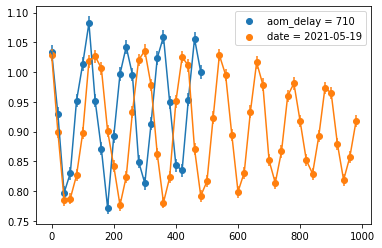

'#ff7f0e'

In [87]:


data = extract_data(aom_delay = 710)
pos = 0
x1, y1, y1errb = analyze_data(data, pos)
print(x1)
print(y1)

data1 = extract_data(date = '2021-05-19')
pos1 = 0 
x01, y01, y01errb = analyze_data(data1, pos1)

print(x01)
print(y01)

fig = plt.figure()
ax1 = fig.add_subplot(111)
a = ax1.scatter(x1, y1)
ax1.errorbar(x1, y1, yerr=y1errb, fmt="None", color = c[0].get_color())
b = ax1.scatter(x01, y01)
ax1.errorbar(x01, y01, yerr=y01errb, fmt="None", color = 
d[0].get_color())
c = ax1.plot(x1, y1)
d = ax1.plot(x01, y01)
plt.legend([a, b],['aom_delay = 710', 'date = 2021-05-19']);
plt.show()


xaxis=r'frequency(GHz)',yaxis=r'Fluor(a.u.)'

d[0].get_color()
